<b>EdNet - Optimize Student Performance: Data Wrangling</b><p>
EdNet contains data from 700,000+ students (users).<p>
Each user has 4 related csv files (KT1, KT2, KT3, KT4). <p>
First, merge the 4 csv files into a single tall dataframe. <p>
Then, save the new dataframe preceeded by an underscore '_' , denoting that it has been processed.

In [1]:
# I get by with a little help from my friends
import numpy as np
import pandas as pd
import glob

In [2]:
cd ~/Desktop/SPRINGBOARD_MASTER/EdNet/data/raw/EdNet-KT4/KT4

C:\Users\Prem\Desktop\SPRINGBOARD_MASTER\EdNet\data\raw\EdNet-KT4\KT4


In [3]:
# file locations
prefix = '~/Desktop/SPRINGBOARD_MASTER/EdNet/data/raw/EdNet-'
folder_1 = prefix + 'KT1/KT1/'
folder_2 = prefix + 'KT2/KT2/'
folder_3 = prefix + 'KT3/KT3/'
folder_4 = prefix + 'KT4/KT4/'
questions = prefix + 'Contents/contents/questions.csv'
questions_df = pd.read_csv(questions)

# create a list of the csv files in current directory
csv_files = glob.glob('*.csv')

In [4]:
# count of csv files in current directory
print(len(csv_files))

298057


In [5]:
# loop: create pandas dataframe
# extract user_id from filename and assign user_id as value to column[0], 'user_id'

z = 134211

for i in range(1):
        df = pd.read_csv(folder_1 + csv_files[z])
        df.insert(0, 'user_id', csv_files[z].split('.')[0])
        
        # convert timestamp column to datetime
        df.timestamp = pd.to_datetime(df['timestamp'], unit='ms')
        
        # drop_duplicates
        df = df.drop_duplicates(subset=['timestamp'], keep='last')
        
        # convert 'elapsed_time' from ms to seconds
        df.elapsed_time = df.elapsed_time.div(1000)
        
        # cleanup values by slicing the leading letter
        df.user_id = df.user_id.str.split('u')[1][1]
        df.user_id = df.user_id.astype('int64')
        df.question_id = df.question_id.str.slice(start=1)
        
        #df.question_id = df.question_id.fillna(0).astype(int)

        # EXPORT csv create a csv of the new dataframe
        output = '_KT1_'+ str(csv_files[z])
        df.to_csv(output, index=False)
        
        z+=1

df.head()

user_id               timestamp  solving_id question_id user_answer  \
0   483095 2019-02-09 06:30:22.965           1        5411           b   
1   483095 2019-02-09 06:30:37.134           2        6203           b   
2   483095 2019-02-09 06:31:01.991           3        5531           b   
3   483095 2019-02-09 06:31:31.040           4         214           a   
4   483095 2019-02-09 06:32:08.033           5        4125           b   

   elapsed_time  
0          28.0  
1          11.0  
2          21.0  
3          26.0  
4          34.0

In [6]:
df.tail()

user_id               timestamp  solving_id question_id user_answer  \
156   483095 2019-03-30 23:45:48.181         102        5272           c   
157   483095 2019-03-30 23:46:38.166         103        9491           c   
158   483095 2019-03-30 23:47:20.707         104        5256           d   
159   483095 2019-03-30 23:47:58.862         105        5775           a   
160   483095 2019-03-30 23:48:56.678         106        5041           b   

     elapsed_time  
156          24.0  
157          28.0  
158          23.0  
159          26.0  
160          34.0

In [7]:
df.dtypes

user_id                  int64
timestamp       datetime64[ns]
solving_id               int64
question_id             object
user_answer             object
elapsed_time           float64
dtype: object

[160, 160, 160, 160, 160, 160]


Text(0.5, 1.0, 'Non-Null Values')

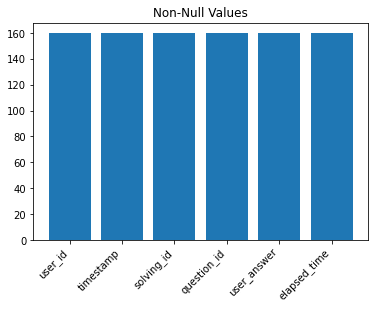

In [8]:
# plot Non-Null Values per column
hey = '_KT1_u' + str(df.iloc[:,0].values[0])
newb = pd.read_csv(hey + '.csv')

newlist = []
for i in range(newb.shape[1]):
    newlist.append(newb.iloc[:,i].notnull().sum())
print(newlist)

import matplotlib.pyplot as plt
plt.bar(newb.columns, newlist)
plt.xticks(rotation=45, ha="right")
plt.title('Non-Null Values')

In [9]:
# clean 'question_df' dataframe
questions_df.question_id = questions_df.question_id.str.slice(start=1)
questions_df.bundle_id = questions_df.bundle_id.str.slice(start=1)
questions_df.explanation_id = questions_df.explanation_id.str.slice(start=1)
questions_df.deployed_at = pd.to_datetime(questions_df.deployed_at, unit='ms')
dfq = questions_df[['question_id', 'correct_answer', 'bundle_id', 'part', 'tags', 'deployed_at']]
dfq.head()

question_id correct_answer bundle_id  part          tags  \
0           1              b         1     1   1;2;179;181   
1           2              a         2     1      15;2;182   
2           3              b         3     1  14;2;179;183   
3           4              b         4     1   9;2;179;184   
4           5              c         5     1   8;2;179;181   

              deployed_at  
0 2019-05-17 11:40:17.098  
1 2019-05-17 11:40:19.720  
2 2019-05-17 11:40:22.784  
3 2019-05-17 11:40:25.357  
4 2019-05-17 11:40:28.439

In [10]:
# new data frame with split value columns 
new = dfq['tags'].str.split(";", n = 8, expand = True) 
  
# making separate column from each tag
dfq['tag1']= new[0] 
dfq['tag2']= new[1] 
dfq['tag3']= new[2]
dfq['tag4']= new[3]
dfq['tag5']= new[4]
dfq['tag6']= new[5]
dfq['tag7']= new[6]
#dfq['tag8']= new[7]

In [11]:
dfq.head()

question_id correct_answer bundle_id  part          tags  \
0           1              b         1     1   1;2;179;181   
1           2              a         2     1      15;2;182   
2           3              b         3     1  14;2;179;183   
3           4              b         4     1   9;2;179;184   
4           5              c         5     1   8;2;179;181   

              deployed_at tag1 tag2 tag3  tag4  tag5  tag6  tag7  
0 2019-05-17 11:40:17.098    1    2  179   181  None  None  None  
1 2019-05-17 11:40:19.720   15    2  182  None  None  None  None  
2 2019-05-17 11:40:22.784   14    2  179   183  None  None  None  
3 2019-05-17 11:40:25.357    9    2  179   184  None  None  None  
4 2019-05-17 11:40:28.439    8    2  179   181  None  None  None

In [12]:
dfq.tag7.notnull().sum()

75

In [13]:
# subset df for notnull question_id rows only
df2 = df[df['question_id'].notnull()]

In [14]:
#dfm = pd.merge(left=dfq2, right=dfq, left_on='question_id', right_on='question_id', how='inner')
dfm = pd.merge(df2, dfq,  how='left', left_on=['question_id'], right_on = ['question_id'])

In [15]:
# create a 'correct' column
dfm['correct'] = np.nan

# loop - if user answers == correct answer, then dfq['correct'][_]= 1
length_df = dfm['user_id'].count()
count = 0
for i in range(length_df):
    if dfm['user_answer'][count] == dfm['correct_answer'][count]:
        dfm['correct'][count] = 1
    if dfm['user_answer'][count] != dfm['correct_answer'][count]:
        dfm['correct'][count] = 0
    count+=1

C:\Users\Prem\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Prem\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [16]:
dfm.head()

user_id               timestamp  solving_id question_id user_answer  \
0   483095 2019-02-09 06:30:22.965           1        5411           b   
1   483095 2019-02-09 06:30:37.134           2        6203           b   
2   483095 2019-02-09 06:31:01.991           3        5531           b   
3   483095 2019-02-09 06:31:31.040           4         214           a   
4   483095 2019-02-09 06:32:08.033           5        4125           b   

   elapsed_time correct_answer bundle_id  part           tags  \
0          28.0              b      3943     5             72   
1          11.0              b      4735     5             82   
2          21.0              a      4063     5             80   
3          26.0              c       214     2  31;32;185;183   
4          34.0              c      2657     5             83   

              deployed_at tag1  tag2  tag3  tag4  tag5  tag6  tag7  correct  
0 2019-10-17 02:18:08.788   72  None  None  None  None  None  None      1.0  
1 2019-05-17 11:33:19.424   82  None  None  None  None  None  None      1.0  
2 2019-09-17 02:50:42.843   80  None  None  None  None  None  None      0.0  
3 1969-12-31 23:59:59.999   31    32   185   183  None  None  None      0.0  
4 2019-09-17 02:35:25.196   83  None  None  None  None  None  None      0.0

In [17]:
dfm = dfm[['user_id', 'question_id','solving_id','bundle_id','correct','part',\
           'timestamp','deployed_at','elapsed_time','tag1','tag2','tag3','tag4','tag5','tag6','tag7']]

In [18]:
dfm.tail()

user_id question_id  solving_id bundle_id  correct  part  \
155   483095        5272         102      3804      0.0     5   
156   483095        9491         103      6842      0.0     5   
157   483095        5256         104      3788      0.0     5   
158   483095        5775         105      4307      0.0     5   
159   483095        5041         106      3573      0.0     5   

                  timestamp             deployed_at  elapsed_time tag1  tag2  \
155 2019-03-30 23:45:48.181 2019-10-17 02:13:50.457          24.0  123  None   
156 2019-03-30 23:46:38.166 2019-05-17 11:36:19.976          28.0   76  None   
157 2019-03-30 23:47:20.707 2019-10-17 02:13:17.775          23.0  120  None   
158 2019-03-30 23:47:58.862 2019-09-16 12:09:18.656          26.0  109  None   
159 2019-03-30 23:48:56.678 2019-10-17 03:05:20.247          34.0  134  None   

     tag3  tag4  tag5  tag6  tag7  
155  None  None  None  None  None  
156  None  None  None  None  None  
157  None  None  None  None  None  
158  None  None  None  None  None  
159  None  None  None  None  None

[160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 111, 107, 58, 31, 7, 0]


Text(0.5, 1.0, 'Non-Null Values')

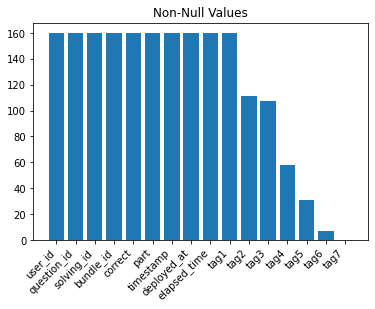

In [19]:
newlist = []
for i in range(dfm.shape[1]):
    newlist.append(dfm.iloc[:,i].notnull().sum())
print(newlist)

import matplotlib.pyplot as plt
plt.bar(dfm.columns, newlist)
plt.xticks(rotation=45, ha="right")
plt.title('Non-Null Values')

In [20]:
# convert tag columns: object --> integer
dfm.tag1 = dfm.tag1.fillna(0).astype(int)
dfm.tag2 = dfm.tag2.fillna(0).astype(int)
dfm.tag3 = dfm.tag3.fillna(0).astype(int)
dfm.tag4 = dfm.tag4.fillna(0).astype(int)
dfm.tag5 = dfm.tag5.fillna(0).astype(int)
dfm.tag6 = dfm.tag6.fillna(0).astype(int)
dfm.tag7 = dfm.tag7.fillna(0).astype(int)
dfm.question_id = dfm.question_id.astype(int)
dfm.bundle_id = dfm.bundle_id.astype(int)

In [21]:
dfm.dtypes

user_id                  int64
question_id              int32
solving_id               int64
bundle_id                int32
correct                float64
part                     int64
timestamp       datetime64[ns]
deployed_at     datetime64[ns]
elapsed_time           float64
tag1                     int32
tag2                     int32
tag3                     int32
tag4                     int32
tag5                     int32
tag6                     int32
tag7                     int32
dtype: object

In [31]:
# concerning repeated value for 'deployed_at' - consider dropping removing all related rows
dfm.deployed_at.value_counts()

1969-12-31 23:59:59.999    11
2019-11-18 08:20:41.120     1
2019-08-09 07:56:55.005     1
2019-06-24 09:21:43.992     1
2018-04-07 16:43:59.220     1
                           ..
2019-05-17 11:36:19.976     1
2019-06-24 09:27:18.742     1
2018-12-21 10:09:00.031     1
2019-10-30 05:25:06.937     1
2019-07-26 07:20:59.780     1
Name: deployed_at, Length: 150, dtype: int64

In [36]:
dfm.columns

Index(['user_id', 'question_id', 'solving_id', 'bundle_id', 'correct', 'part',
       'timestamp', 'deployed_at', 'elapsed_time', 'tag1', 'tag2', 'tag3',
       'tag4', 'tag5', 'tag6', 'tag7'],
      dtype='object')

In [41]:
#Standardize the magnitude of numeric features using scaler
from sklearn.preprocessing import StandardScaler
data = dfm[['user_id', 'question_id', 'solving_id', 'bundle_id', 'correct', 'part','elapsed_time', 'tag1', 'tag2', 'tag3',
       'tag4', 'tag5', 'tag6', 'tag7']]
scaler = StandardScaler()
#print(scaler.fit(data))
#print(scaler.mean_)
#print(scaler.transform(data))

In [42]:
#Split data into testing and training datasets
import numpy as np
from sklearn.model_selection import train_test_split
X = data[['user_id', 'question_id', 'solving_id', 'bundle_id', 'part','elapsed_time', 'tag1', 'tag2', 'tag3',
       'tag4', 'tag5', 'tag6', 'tag7']]
y = data.correct

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [58]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
#clf.predict_proba(X_train)
print(lr.score(X_test, y_test))

0.49056603773584906


C:\Users\Prem\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [59]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
#clf.predict_proba(X_train)
print(lr.score(X_test, y_test))

0.49056603773584906


C:\Users\Prem\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [65]:
#clf
clf = LogisticRegression(random_state=42).fit(X, y)
clf.predict(X)
clf.predict_proba(X)
clf.score(X, y)

0.55

In [96]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
nb.score(X,y)

0.61875

In [69]:
# Stochastic gradient descent
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='modified_huber', shuffle=True, random_state=42)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
sgd.score(X,y)

0.5

In [81]:
# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn.score(X,y)

0.63125

In [90]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier(n_estimators=70, oob_score=True, n_jobs=1, \
                            random_state=42, max_features = None, min_samples_leaf = 30)
rfm.fit(X_train, y_train)
y_pred = rfm.predict(X_test)
rfm.score(X,y)

0.55

In [94]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=0.025, random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
svm.score(X,y)

0.58125

In [35]:
#sf = dfm[dfm.deployed_at[:,:].value == '1969-12-31 23:59:59.999']

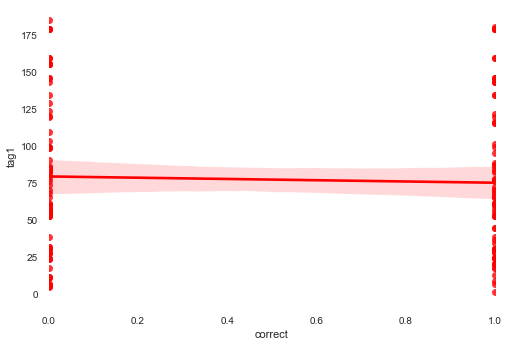

In [46]:
import seaborn as sns
#plt.plot(dfm.correct, dfm.tag1)
ax = sns.regplot(x=dfm.correct, y=dfm.tag1, color="r")

In [97]:
# EDA
from pandas_profiling import ProfileReport
profile = ProfileReport(dfm, title="Pandas Profiling Report")

profile.to_widgets()
profile.to_notebook_iframe()

Exception ignored in: <function Comm.__del__ at 0x000001959C54C288>
Traceback (most recent call last):
  File "C:\Users\Prem\anaconda3\lib\site-packages\ipykernel\comm\comm.py", line 76, in __del__
    self.close(deleting=True)
  File "C:\Users\Prem\anaconda3\lib\site-packages\ipykernel\comm\comm.py", line 103, in close
    if self._closed:
  File "C:\Users\Prem\anaconda3\lib\site-packages\traitlets\traitlets.py", line 556, in __get__
    return self.get(obj, cls)
  File "C:\Users\Prem\anaconda3\lib\site-packages\traitlets\traitlets.py", line 534, in get
    % (self.name, obj))
traitlets.traitlets.TraitError: No default value found for _closed trait of <ipykernel.comm.comm.Comm object at 0x00000195BF4E7548>
